### Goal

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [14]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-12-06-bis/triple/kerling/"

### From here; automatic run

In [15]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241206$25^RELAXED IN AA$25^NOT RELAXED IN AA$triple.txt
20241206$25^RELAXED IN PB$25^not relaxed in PB$25^Relaxed + KP 0.02$25^Relaxed + KP 0.04$triple.txt


In [16]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [17]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        df = pd.read_csv(root + file, sep="\t")
        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[1:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,TOTAL WORK,TOUGHNESS,Name
0,1,3256.3,67.0,78.1,53.1,4.340000e+09,47.8,2.92,0.01340,49.4,...,0.01590,0.00338,32.56,2.80,63.86,83.0,0.0255,0.01120,114000000.0,RELAXED IN AA
1,2,4182.1,80.2,101.5,52.5,3.840000e+09,54.4,3.13,0.05760,247.0,...,0.05960,0.01800,31.39,3.36,61.46,284.0,0.0679,0.04660,371000000.0,RELAXED IN AA
2,3,4939.9,82.7,97.6,64.4,4.210000e+09,69.7,3.19,0.00572,35.2,...,0.00756,0.00240,30.30,4.67,58.32,82.9,0.0168,0.00844,56200000.0,RELAXED IN AA
3,4,4096.3,80.4,103.5,50.5,4.080000e+09,56.8,3.44,0.06880,287.0,...,0.07100,0.02090,23.62,4.57,45.61,318.0,0.0776,0.03920,319000000.0,RELAXED IN AA
4,5,2844.2,61.2,64.8,55.9,4.000000e+09,38.2,2.93,0.09080,262.0,...,0.09300,0.01940,28.75,2.88,55.67,290.0,0.1020,0.04470,517000000.0,RELAXED IN AA


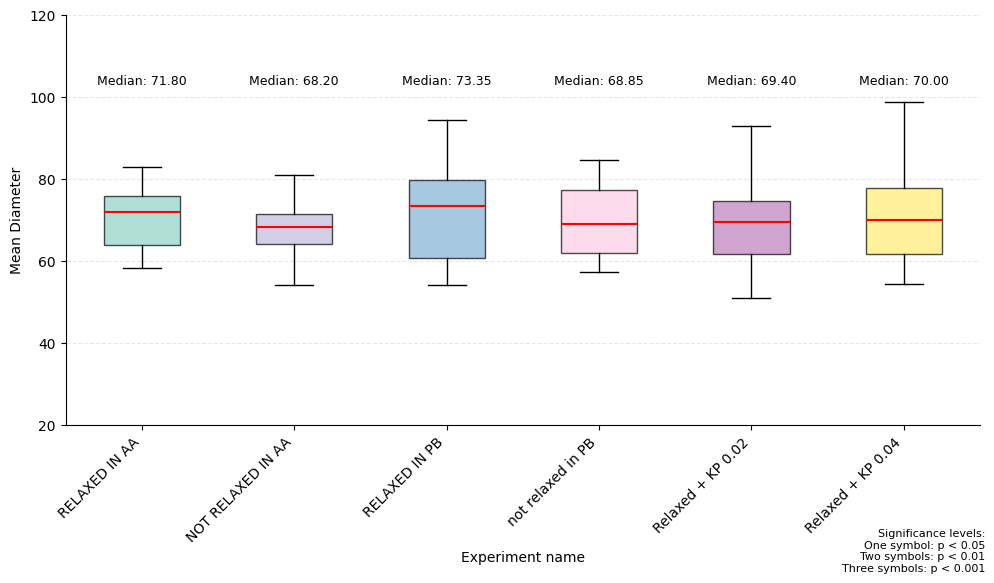

In [18]:
header = 'MEAN DIAMETER'
ymin = 20
ymax = 120
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between NOT RELAXED IN AA and Relaxed + KP 0.02: p = 0.0203


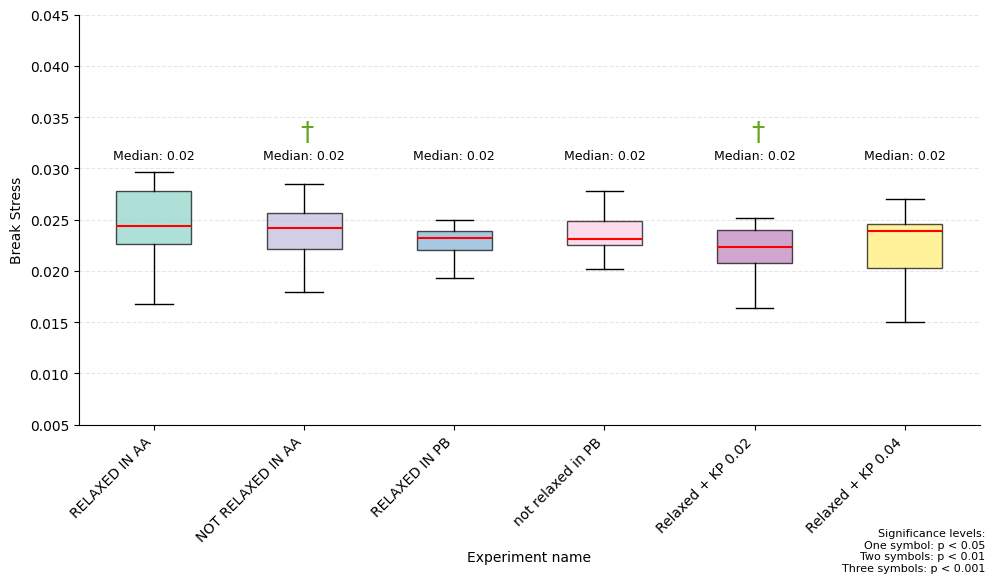

In [19]:
header = 'BREAK STRESS'
ymin = 0.005
ymax = 0.045
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between NOT RELAXED IN AA and not relaxed in PB: p = 0.0472


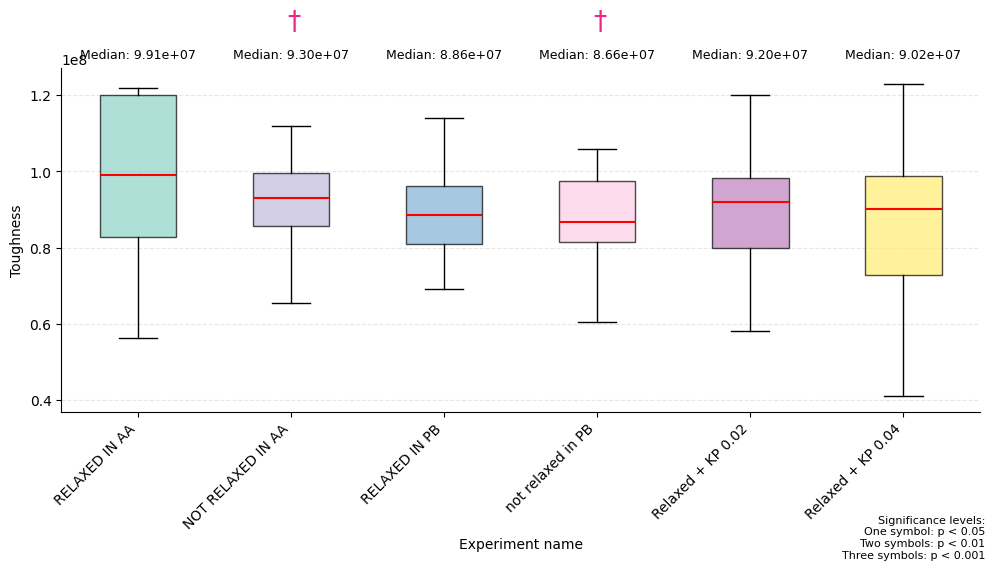

In [20]:
header = 'TOUGHNESS'
ymin = None
ymax = None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

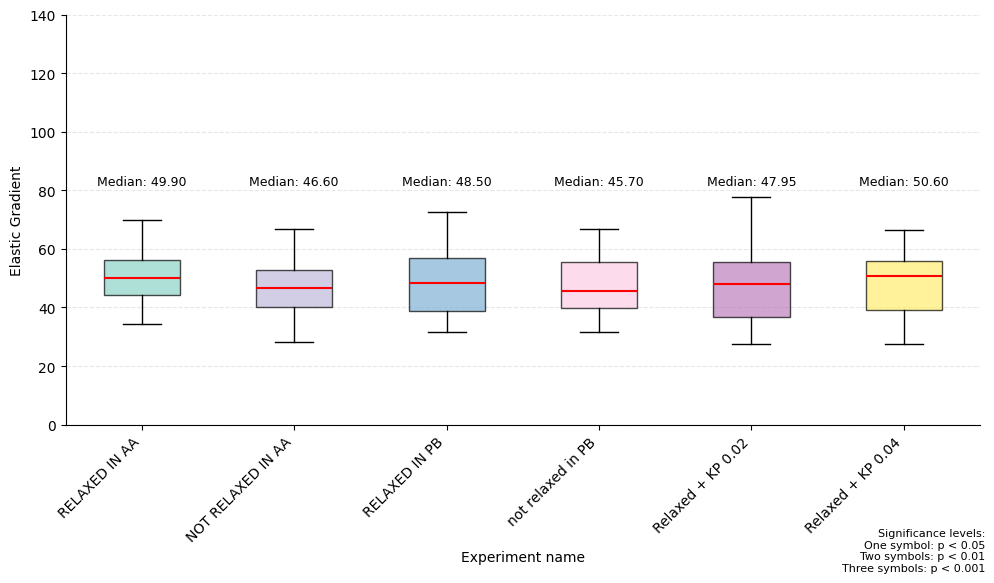

In [21]:
header = 'ELASTIC GRADIENT'
ymin = 0
ymax =  140
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between NOT RELAXED IN AA and RELAXED IN PB: p = 0.0031
Statistical significance between NOT RELAXED IN AA and Relaxed + KP 0.02: p = 0.0011


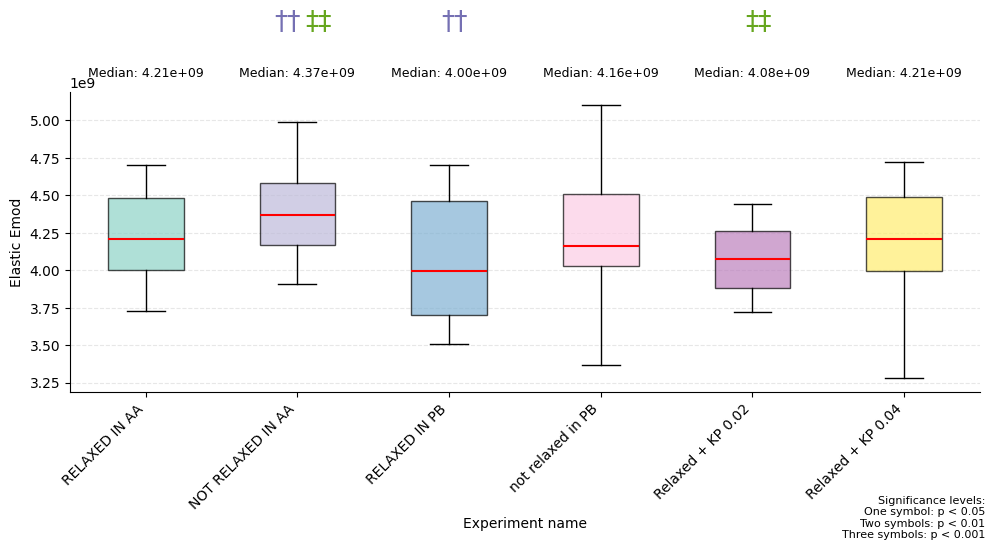

In [22]:
header = 'ELASTIC EMOD'
ymin = None
ymax =  None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()